# **Machine Learning with Python and Scikit-Learn**

## **Lesson 1 - Linear Regression and Gradient Descent**

In [ ]:
# Download Dataset
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7a6eb82bfce0>)

In [ ]:
import pandas as pd

In [ ]:
# Memprediksi biaya untuk pelanggan selanjutnya menggunakan 6 faktor yang ada di dalam dataset
medical_df = pd.read_csv('medical.csv')
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Struktur Data (Overview)**
1. Total Data: 1.338 baris (ukuran yang cukup pas, tidak terlalu kecil dan tidak terlalu besar untuk belajar).

2. Target Variable: Kolom charges (biaya asuransi) adalah target yang ingin kita prediksi. Karena nilainya angka kontinu (pecahan), maka kasus ini adalah Regression.

3. Fitur (Predictors): Ada 6 faktor yang memengaruhi biaya, yaitu age, sex, bmi, children, smoker, dan region.

In [ ]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Penjelasan Data:
1. Mean (Rata-rata): Nilai rata-rata dari seluruh data di kolom tersebut.

2. Std (Standard Deviation): Seberapa jauh data menyebar dari rata-rata. Semakin besar nilainya, semakin bervariasi datanya.

3. Min & Max: Nilai terendah dan tertinggi.

4. 25%, 50%, 75% (Kuartil): Digunakan untuk melihat distribusi. 50% (Median) adalah nilai
tengah data.

Analisis Data:
1. Analisis Usia: Pada data rentang usia adalah 18 hingga 64 tahun. Oleh karena itu, dataset ini mencakup orang dewasa usia produktif (dengan rata-ratanya adalah 39 tahun).
2. BMI: Rata-rata BMI pada dataset adalah 30.66. Pada kategori kesehatan angka BMI > 30 termasuk ke dalam obesitas. Oleh karena itu, dapat disimpulkan bahwa sebagian besar orang dalam dataset ini memiliki berat badan berlebih.
3. Analisis Biaya (Charges):
*   Rata-rata vs Median: Rata-ratanya 13.270, tapi mediannya (50%) hanya 9.382.
*   Interpretasi: Ada perbedaan besar antara rata-rata dan nilai tengah. Ini menandakan data "Skewed" (miring) ke kanan. Artinya, ada segelintir orang yang biaya asuransinya sangat mahal (Max: 63.770) yang menarik nilai rata-rata menjadi tinggi, padahal mayoritas orang membayar di bawah 10.000.





In [ ]:
import plotly.express as px # Library untuk membuat grafik interaktif.
# Memberikan kontrol penuh atas setiap elemen grafik (judul, label sumbu, ukuran font, warna garis).
import matplotlib
import matplotlib.pyplot as plt
# Membuat grafik statistik yang kompleks (seperti heatmap, boxplot, atau violin plot) hanya dengan sedikit baris kode.
import seaborn as sns
# Magic Command yang digunakan untuk memastikan agar grafik yang dibuat langsung muncul di bawah baris kode
%matplotlib inline

In [ ]:
sns.set_style(style='darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Penjelasan Age:
1. Data age adalah float atau numerik.
2. Umur minimum di angka 18 tahun dan maksimumnya di angka 64 tahun.
3. Dapat menggunakan bins berjumlah 47 untuk setiap tahun (46 bins) dan box plot (1 bin).

In [ ]:
fig_age = px.histogram(medical_df,
                       marginal='box',
                       x='age',
                       nbins=47,
                       title='Distribution of Age')
fig_age.update_layout(bargap=0.1)
fig_age.show()

**Penjelasan Histrogram:**

Pada setiap umur jumlah sample pada datasetnya adalah 20-30, kecuali untuk umur 18 dan 19 tahun yang gap nya sangat banyak.

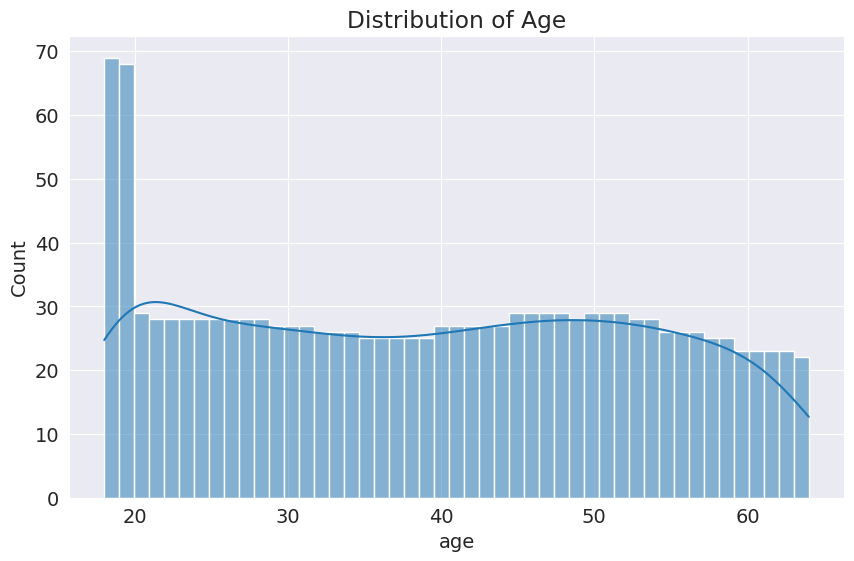

In [ ]:
sns.histplot(medical_df.age, bins=47, kde=True)
plt.title('Distribution of Age')
plt.show()

### BMI (Body Mass Index)

In [ ]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Penjelasan BMI:

1. Pada mean (50%) berada pada angka 30.4. Hal ini dapat diartikan bahwa pada dataset rata-rata mengalami obesitas (BMI > 30).
2. Minimum angka BMI di angka 15.96 dan maksimum di angka 53.13.
3. Pada std atau simpangan baku di BMI adalah sebesar 6.09 di mana ini termasuk ke dalam angka yang lumayan besar, artinya perbedaan fisik nyata antar individu dalam data tersebut.

In [ ]:
fig_bmi = px.histogram(medical_df,
                       marginal='box',
                       x='bmi',
                       color_discrete_sequence=['red'],
                       title='Distribution of BMI')
fig_bmi.update_layout(bargap=0.1)
fig_bmi.show()

Penjelasan Histogram:

Data BMI ini mengikuti Gaussian Distribution (Distribusi Normal).

Analisis Visual
1. Puncaknya berada di tengah (sekitar angka 30).

2. Sisi kiri dan kanan terlihat menurun secara simetris.

3. Data paling banyak menumpuk di nilai rata-rata, dan semakin menjauh dari rata-rata, jumlah datanya semakin sedikit.

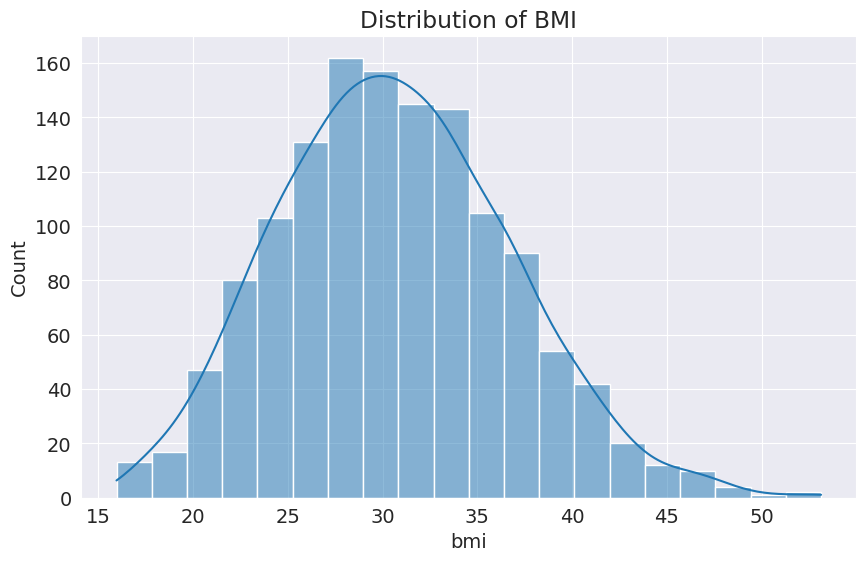

In [ ]:
sns.histplot(medical_df.bmi, bins=20, kde=True)
plt.title('Distribution of BMI')
plt.show()

### Charges (Biaya)

In [ ]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Penjelasan Charges:

1. Pada mean (50%) berada pada angka 9.382. Hal ini dapat diartikan bahwa pada dataset rata-rata jauh lebih besar daripada nilai tengah (median), itu artinya dataset "Miring ke Kanan". Mayoritas orang membayar di bawah 10.000, tapi ada segelintir orang yang membayar sangat mahal sehingga menarik angka rata-rata menjadi tinggi.
2. Analisis Kuartil:


    *   25% orang membayar di bawah 4.740.
    *   50% orang membayar di bawah 9.382.
    *   75% orang membayar di bawah 16.639.
    * Max: 63.770.

    Analisis: Perhatikan lonjakan dari 75% ke nilai Max. Jaraknya mencapai hampir 47.000! Ini mengonfirmasi adanya "Heavy Tail" atau ekor panjang di sisi kanan grafik, yang berisi pasien-pasien dengan biaya medis luar biasa tinggi (mungkin perokok dengan BMI tinggi).

3. Pada std atau simpangan baku di BMI adalah sebesar 12110.011. Angka ini hampir setara dengan nilai rata-ratanya sendiri! Ini menunjukkan bahwa variasi biaya asuransi antar orang sangatlah ekstrem. Ada yang bayar sangat murah (1.121) dan ada yang sangat mahal (63.770). Data seperti ini biasanya sulit diprediksi hanya dengan model linear sederhana.

In [ ]:
fig_charges = px.histogram(medical_df,
                       marginal='box',
                       x='charges',
                       color= 'smoker',
                       color_discrete_sequence=['blue', 'green'],
                       title='Distribution of Charges')
fig_charges.update_layout(bargap=0.1)
fig_charges.show()

Penjelasan Histogram:

Histogram di atas menggunakan 2 pendekatan yaitu dengan sample orang yang merokok dan yang non perokok.
1. Pada perokok chargesnya mayoritas sangat tinggi, meskipun jumlah orangnya rendah.
2. Pada non perokok chargesnya mayorikat kecil dan jumlah non perokok lebih banyak daripada yang perokok.
3. Pada perokok ada yang membayar dengan jumlah yang sangat tinggi yaitu di angka 63770.428010

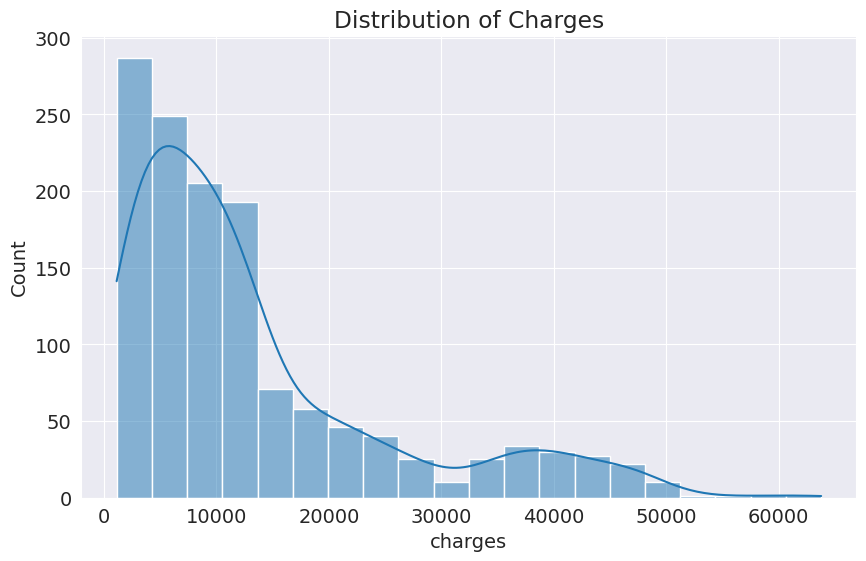

In [ ]:
sns.histplot(medical_df.charges, bins=20, kde=True)
plt.title('Distribution of Charges')
plt.show()

In [ ]:
fig_charges = px.histogram(medical_df,
                       marginal='box',
                       x='charges',
                       color= 'sex',
                       color_discrete_sequence=['red', 'blue'],
                       title='Distribution of Charges (Sex)')
fig_charges.update_layout(bargap=0.1)
fig_charges.show()

In [ ]:
fig_charges = px.histogram(medical_df,
                       marginal='box',
                       x='charges',
                       color= 'region',
                       color_discrete_sequence=['purple', 'yellow', 'green', 'blue'],
                       title='Distribution of Charges (Region)')
fig_charges.update_layout(bargap=0.1)
fig_charges.show()

### Smoker

In [ ]:
medical_df.replace({'smoker':{1:'yes', 0:'no'}}, inplace=True)
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df,
             x='smoker',
             color='sex',
             color_discrete_sequence=['pink', 'blue'],
             title='Distribution of Smoker (Sex)')

### Age and Charges

In [ ]:
fig= px.scatter(medical_df,
                x='age',
                y='charges',
                color= 'smoker',
                opacity= 0.8,
                color_discrete_sequence=['blue', 'green'],
                hover_data=['sex'],
                title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

Penjelasan:
1. Cluster pertama itu terdiri dari perokok, di mana mendapatkan charges yang tinggi.
2. Cluster kedua terdiri dari perokok dan non perokok yang mana memiliki 2 perbedaan cluter yaitu perokok tanpa medical issue yang berat dan non-perokok dengan medical issue.
3. Cluster ketiga, terdiri dari non-perokok yang memiliki charges rendah.

### BMI and Charges

In [ ]:
fig= px.scatter(medical_df,
                x='bmi',
                y='charges',
                color= 'smoker',
                opacity= 0.8,
                color_discrete_sequence=['blue', 'green'],
                hover_data=['sex'],
                title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

Penjelasan:

Tampaknya, bagi non-perokok, peningkatan BMI tidak terkait dengan peningkatan biaya medis. Namun, biaya medis tampaknya jauh lebih tinggi bagi perokok dengan BMI lebih dari 30.

In [ ]:
fig = px.violin(medical_df, x='children', y='charges')
fig.show()

### Correlation

Correlation (Korelasi) adalah teknik untuk mengukur seberapa kuat hubungan antara dua variabel. Sederhananya, korelasi membantu kita menjawab: "Jika nilai A naik, apakah nilai B juga ikut naik, turun, atau tidak berpengaruh sama sekali?"

1. Positif (+1): Hubungan searah. Jika bmi naik, charges cenderung naik.

2. Negatif (-1): Hubungan berbalik nilai. Jika variabel A naik, variabel B turun.

3. Nol (0): Tidak ada hubungan linear sama sekali antara kedua variabel tersebut.

In [ ]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [ ]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [ ]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [ ]:
smoker_values = {'yes': 1, 'no': 0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

Penjelasan Korelasi:

1. Kekuatan (Strength): Semakin besar nilai absolut koefisien korelasi, semakin kuat hubungannya.

    Nilai ekstrem -1 dan 1 menunjukkan hubungan linier sempurna di mana perubahan pada satu variabel disertai dengan perubahan yang konsisten sempurna pada variabel lainnya. Untuk hubungan ini, semua titik data berada pada satu garis. Dalam praktiknya, Anda tidak akan melihat kedua jenis hubungan sempurna tersebut.

    Koefisien nol menunjukkan tidak ada hubungan linier. Ketika satu variabel meningkat, tidak ada kecenderungan pada variabel lain untuk meningkat atau menurun.

    Ketika nilainya berada di antara 0 dan +1/-1, ada hubungan, tetapi titik-titiknya tidak semuanya berada pada satu garis. Ketika r mendekati -1 atau 1, kekuatan hubungan meningkat dan titik-titik data cenderung lebih dekat ke garis.

2. Arah (Direction): Tanda koefisien korelasi menunjukkan arah hubungan.

    Koefisien positif menunjukkan bahwa ketika nilai satu variabel meningkat, nilai variabel lain juga cenderung meningkat. Hubungan positif menghasilkan kemiringan ke atas pada scatterplot.

    Koefisien negatif menunjukkan kasus di mana nilai satu variabel meningkat, sedangkan nilai variabel lainnya cenderung menurun. Hubungan negatif menghasilkan kemiringan ke bawah.



    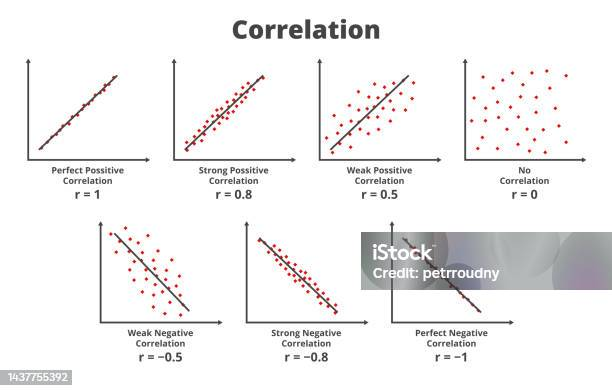

In [ ]:
medical_df.corr(numeric_only=True)

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

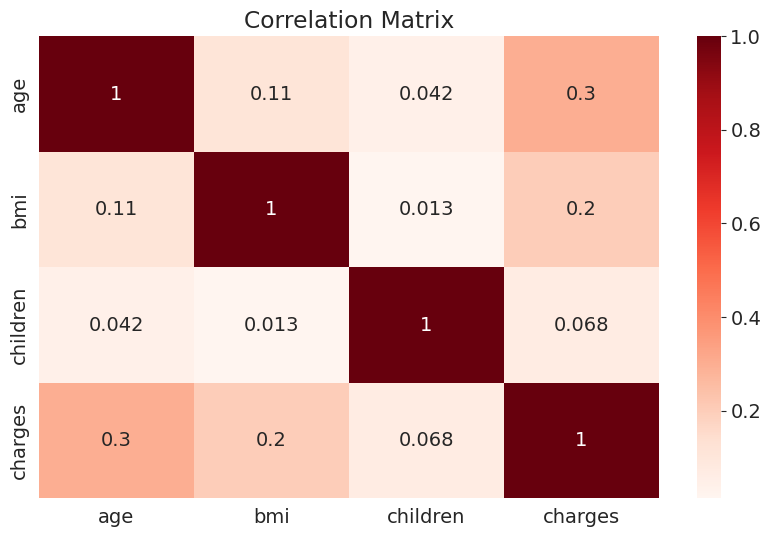

In [ ]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()

Kesalahan korelasi vs. kausalitas: Perhatikan bahwa korelasi yang tinggi tidak dapat digunakan untuk menafsirkan hubungan sebab-akibat antara fitur. Dua fitur
X
 dan
Y
 dapat berkorelasi jika
X
 menyebabkan
Y
 atau jika
Y
 menyebabkan
X
, atau jika keduanya disebabkan secara independen oleh faktor lain
Z
, dan korelasi tersebut tidak akan lagi berlaku jika salah satu hubungan sebab-akibat terputus.

Ada juga kemungkinan bahwa
X
 dan
Y
 hanya tampak berkorelasi karena sampelnya terlalu kecil.

Meskipun ini mungkin tampak jelas, komputer tidak dapat membedakan antara korelasi dan kausalitas, dan keputusan yang didasarkan pada sistem otomatis seringkali dapat memiliki konsekuensi besar bagi masyarakat, sehingga penting untuk mempelajari mengapa sistem otomatis menghasilkan hasil tertentu. Menentukan hubungan sebab-akibat membutuhkan wawasan manusia.

### Linear Regression using a Single Feature

**Linear Regression** adalah algoritma Machine Learning yang paling dasar dan populer untuk memprediksi angka (kasus Regression).

Tujuannya adalah untuk mencari hubungan antara fitur (seperti usia atau BMI) dengan target (seperti biaya asuransi) dalam bentuk garis lurus.

Rumus:

**y = wx + b**


Penjelasan Komponen:

1. $y$ (Dependent Variable / Target): Nilai yang ingin kita prediksi (dalam kasus kali ini adalah kolom charges atau biaya asuransi).
2. $x$ (Independent Variable / Feature): Data input yang digunakan untuk memprediksi (dalam kasus ini adalah kolom age atau usia).
3. $w$ (Weight / Slope): Kemiringan garis. Angka ini menentukan seberapa besar pengaruh perubahan $x$ terhadap $y$. Misalnya, jika $w$ adalah 250, berarti setiap bertambah 1 tahun usia, biaya asuransi naik rata-rata 250 unit.
4. $b$ (Bias / Intercept): Titik potong pada sumbu $y$. Ini adalah nilai dasar $y$ ketika $x$ bernilai nol.


In [ ]:
# 'no' = 0
non_smoker_df = medical_df[medical_df['smoker'] == 'no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

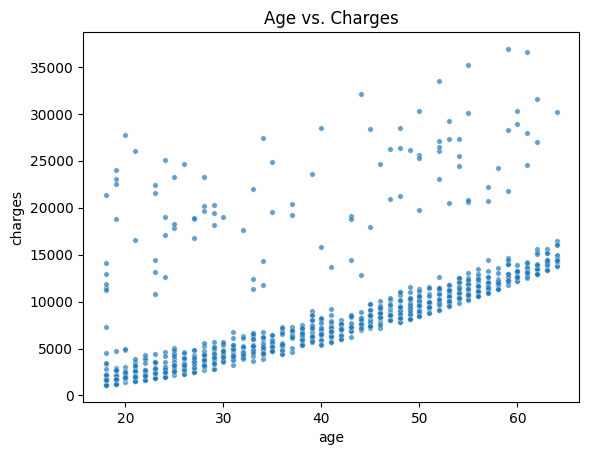

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [ ]:
def estimate_charges(age, w, b) :
  return w * age + b

In [ ]:
w = 50
b = 100

ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'Estimated Charges')

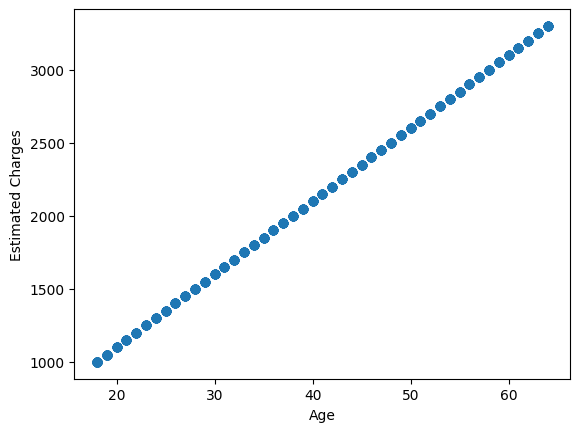

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges')

Text(0, 0.5, 'Estimated Charges')

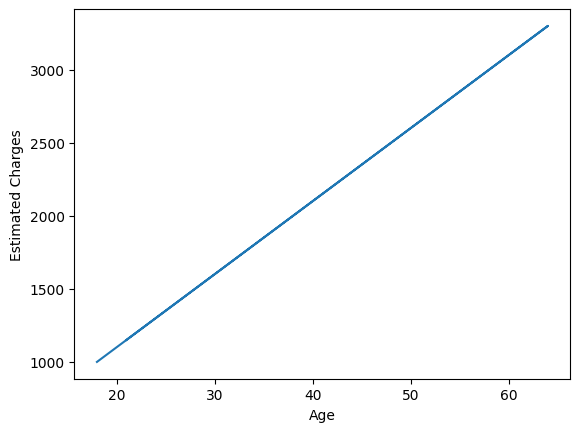

In [ ]:
plt.plot(ages, estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges')

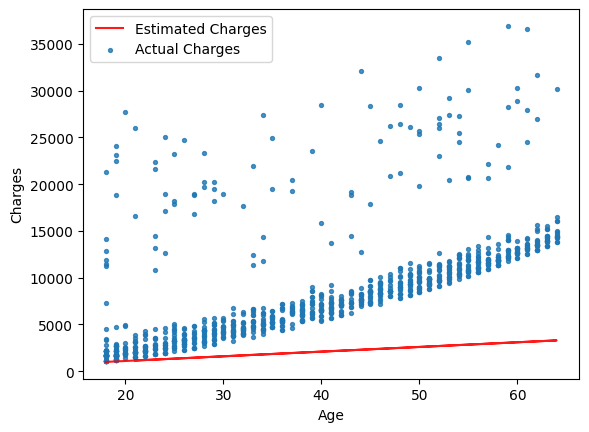

In [ ]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);

plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimated Charges', 'Actual Charges']);

In [ ]:
def try_parameters(w, b) :
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9);

  plt.scatter(ages, target, s=8, alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges');
  plt.legend(['Estimated Charges', 'Actual Charges']);

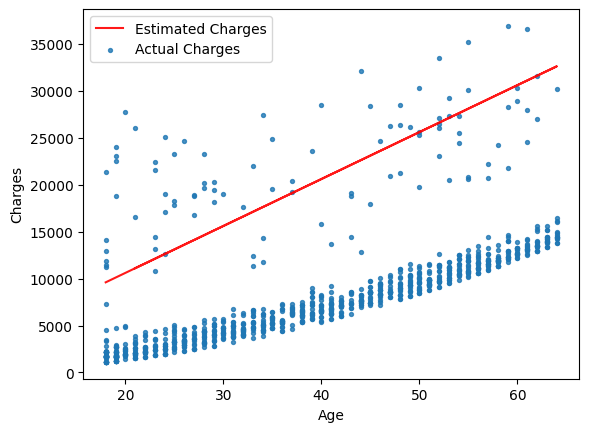

In [ ]:
try_parameters(500, 600)

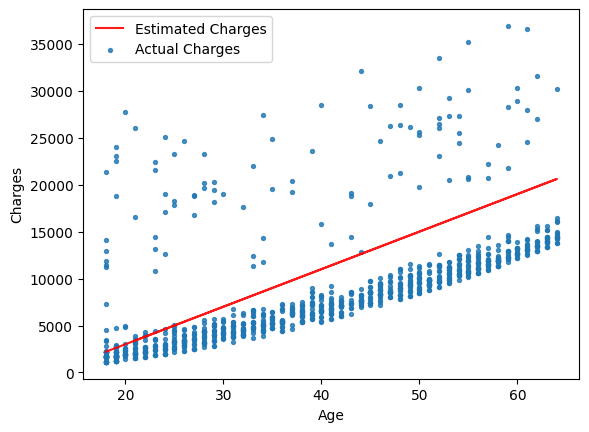

In [ ]:
try_parameters(400, -5000)

Inti dari proses "Learning" dalam Machine Learning adalah cara agar komputer bisa mencari nilai matematika yang paling pas secara otomatis, tanpa kita harus menebak-nebak.

Masalah utama adalah mencari nilai w dan b. Dalam liniar regression, garis ditentukan oleh dua angka yaitu
1. w (Weight/Beban): Kemiringan garis (seberapa tajam kenaikan biaya setiap umur bertambah).
2. b (Bias): Titik potong (biaya dasar asuransi saat umur 0).



### Loss/Cost Function

Komputer butuh angka untuk tahu seberapa "salah" tebakannya.

* Misal: Jika garis tebakan komputer jauh dari titik data asli, skor kesalahannya besar.

* Jika garisnya dekat dengan titik data, skor kesalahannya kecil.

* Dalam statistik, ini biasanya menggunakan Mean Squared Error (MSE).

Komputer mengukur seberapa jauh perbedaan (error) antara hasil prediksi $y$ dengan data asli yang ada di lapangan.

Rumus:
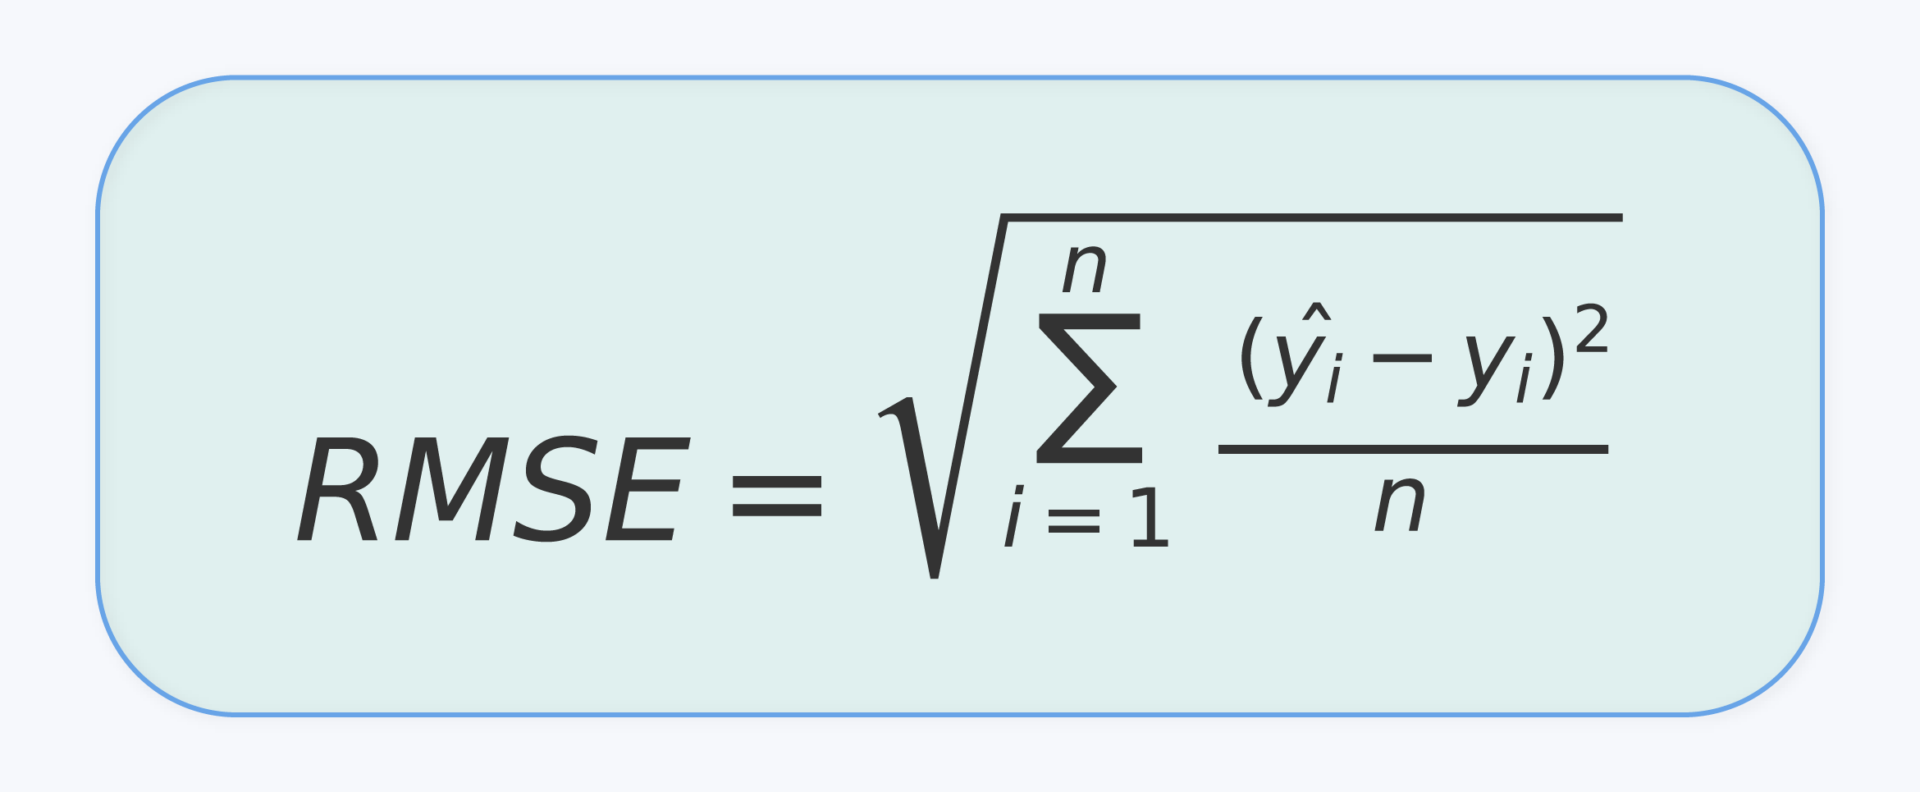


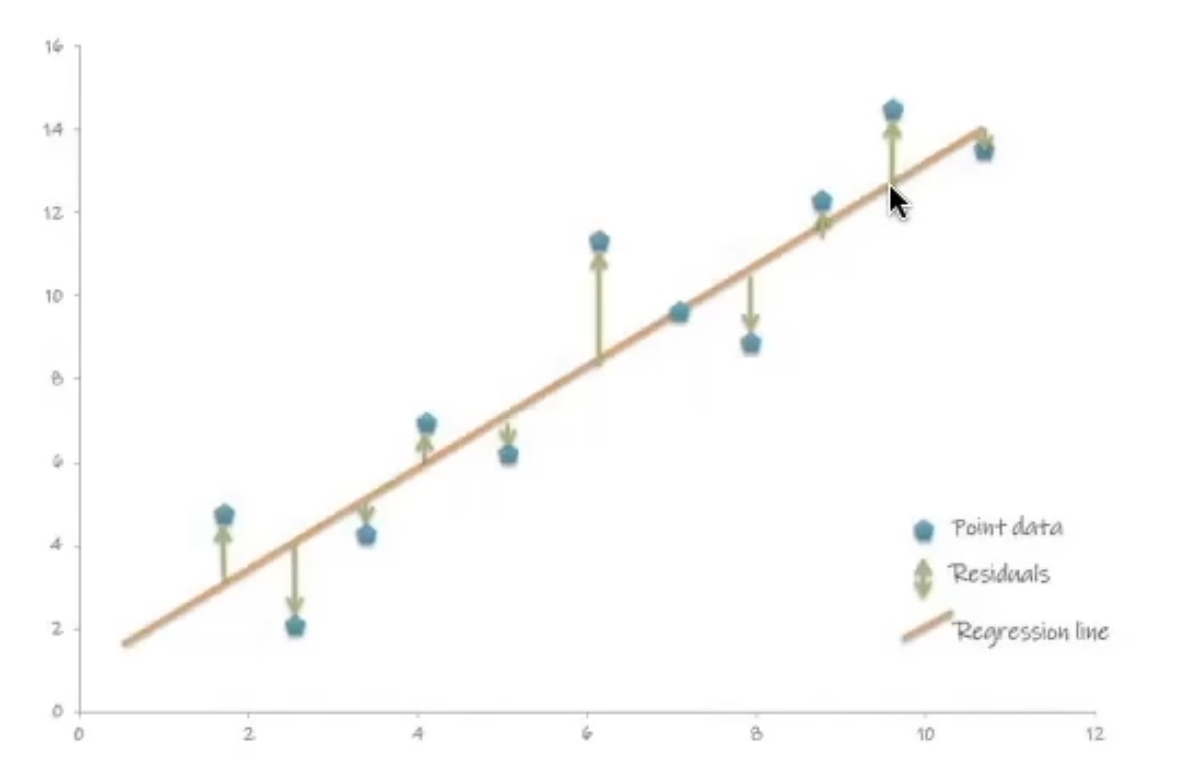

In [ ]:
import numpy as np

In [ ]:
def rmse (targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
w = 50
b = 100

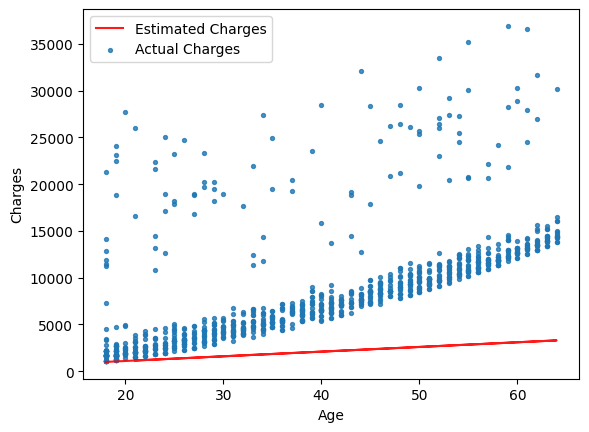

In [ ]:
try_parameters(w, b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


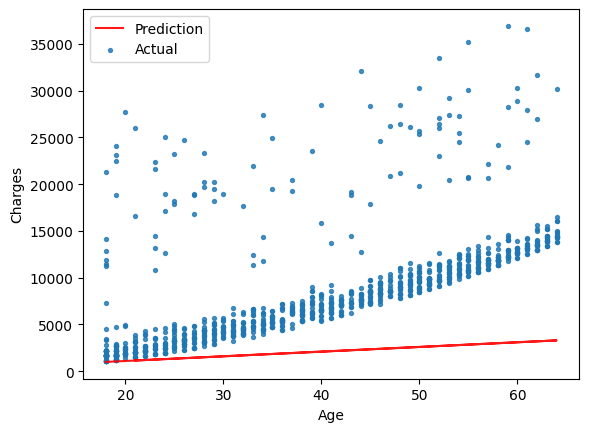

In [ ]:
try_parameters(50, 100)

1. Mengambil Data

    ages = non_smoker_df.age: Kolom usia sebagai fitur (x). Perhatikan bahwa di sini kamu menggunakan non_smoker_df, yang artinya kamu menyederhanakan masalah dengan hanya melihat data orang yang tidak merokok agar polanya lebih terlihat jelas.

    target = non_smoker_df.charges: Kolom biaya sebagai target (y) yang ingin ditebak.

2. Melakukan Prediksi
    predictions = estimate_charges(ages, w, b): Di baris ini, kamu memasukkan nilai w (kemiringan) dan b (titik potong) yang kamu tentukan sendiri ke dalam rumus y = w x + b. Hasilnya adalah sekumpulan angka tebakan biaya asuransi.

3. Visualisasi (Melihat Hasil)
    * plt.plot(ages, predictions, 'r'...): Ini menggambar garis merah yang mewakili model/tebakanmu.

    * plt.scatter(ages, target...): Ini menggambar titik-titik biru yang merupakan data asli di lapangan.

    * Tujuan Visual: Kamu ingin melihat seberapa dekat garis merah tersebut melewati titik-titik biru. Jika garisnya memotong tepat di tengah kumpulan titik, maka tebakanmu bagus.

4. Menghitung "Rapor" (RMSE Loss)

    * loss = rmse(target, predictions): Karena mata manusia bisa tertipu oleh visual, kamu butuh angka pasti. Fungsi ini menghitung selisih rata-rata antara titik biru (asli) dan garis merah (prediksi).

    * print("RMSE Loss: ", loss): Menampilkan nilai error tersebut.

### Optimizer

**Optimizer** adalah "otak" di balik proses belajar Machine Learning. Jika Loss Function (seperti RMSE) bertugas memberitahu seberapa besar kesalahan model, maka Optimizer bertugas mencari tahu bagaimana cara mengubah nilai $w$ (weight) dan $b$ (bias) agar kesalahan tersebut berkurang di percobaan berikutnya.

**Cara Manual (Logika Dasar)**

In [ ]:
def sgd_step(w, b, x, target, learning_rate):
    # 1. Buat prediksi
    prediction = w * x + b

    # 2. Hitung error
    error = prediction - target

    # 3. Hitung Gradient (arah perubahan)
    # Turunan matematis untuk w dan b
    grad_w = 2 * error * x
    grad_b = 2 * error

    # 4. Update parameter (Langkah Optimizer)
    w_new = w - (learning_rate * grad_w)
    b_new = b - (learning_rate * grad_b)

    return w_new, b_new

# Contoh penggunaan sederhana
w, b = 0.0, 0.0 # Tebakan awal acak
lr = 0.001      # Learning Rate

# Mengambil satu baris data acak dari datasetmu
x_sample = non_smoker_df.age.iloc[0]
y_sample = non_smoker_df.charges.iloc[0]

# Melakukan satu langkah perbaikan
w, b = sgd_step(w, b, x_sample, y_sample, lr)
print(f"w baru: {w}, b baru: {b}")

### Linear Regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression

In [ ]:
help(model.fit)

Help on function fit in module sklearn.linear_model._base:

fit(self, X, y, sample_weight=None)
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']] # Dua dimensi
targets = non_smoker_df.charges
print('input.shape :', inputs.shape)
print('targets.shape :', targets.shape)

input.shape : (1064, 1)
targets.shape : (1064,)


Penjelasan:

**Perbedaan Konsep Fitur vs Target**
1. inputs (Dua Dimensi): Dalam Machine Learning, kita biasanya memprediksi sesuatu berdasarkan banyak faktor (Fitur). Meskipun saat ini kamu baru menggunakan satu fitur yaitu age, struktur datanya harus tetap siap untuk menampung fitur lain nantinya (seperti bmi, children, dll).

  * Dimensi 1: Jumlah baris (sampel data)
  * Dimensi 2: Jumlah kolom (fitur-fitur)
  
2. targets (Satu Dimensi): Target biasanya hanya berupa satu nilai tunggal yang ingin ditebak (biaya asuransi), sehingga cukup disimpan dalam satu deret angka saja.

**Standar Matriks dalam Matematika**

Algoritma Linear Regression bekerja menggunakan operasi matriks. Di dalam Scikit-Learn, fungsi .fit(X, y) mengharapkan:
1. $X$ (Inputs) sebagai matriks $[n\_samples, n\_features]$.
2. $y$ (Targets) sebagai vektor $[n\_samples]$.

Jika kamu menulis non_smoker_df['age'] (tanda kurung satu), Python akan menganggapnya sebagai Series (1D). Dengan menulis non_smoker_df[['age']] (tanda kurung dua), kamu memaksa Python menganggapnya sebagai DataFrame (2D) meskipun hanya ada satu kolom.

In [ ]:
model = LinearRegression()
model.fit(inputs, targets)

LinearRegression()

Penjelasan:

Perintah model.fit(inputs, targets) adalah momen di mana "keajaiban" Machine Learning terjadi. Secara teknis, tujuannya memang untuk meminimalkan loss (kesalahan) sekecil mungkin agar model menjadi sangat akurat.

 .fit() adalah algoritma akan melakukan proses iterasi (berulang-ulang) untuk mencari nilai $w$ (weight) dan $b$ (bias) yang menghasilkan error paling kecil. Bayangkan sebuah lembah; .fit() bertugas menuntun model berjalan menuruni lereng hingga mencapai dasar lembah di mana loss berada di titik terendah.

In [ ]:
model.coef_

array([267.24891283])

Nilai $w$ (267.25): Ini berarti bahwa untuk setiap bertambah 1 tahun usia, biaya asuransi orang yang tidak merokok rata-rata akan naik sebesar $267.25. Inilah yang disebut sebagai slope atau kemiringan hubungan antara usia dan biaya.

In [ ]:
model.intercept_

np.float64(-2091.4205565650864)

Nilai $b$ (-2091.42): Ini adalah titik potong sumbu Y. Secara matematis, ini adalah biaya jika usia seseorang adalah 0 tahun. Karena nilainya negatif, ini hanyalah angka penyeimbang agar garisnya pas dengan data (ingat, regresi linear selalu menarik garis lurus, jadi terkadang nilai awal ini tidak selalu logis secara medis, tapi logis secara matematis).

In [ ]:
model.predict(np.array([[23],
                       [37],
                       [61]]))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
inputs

age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns]

In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(targets, predictions)

np.float64(4662.505766636395)

Nilai RMSE sebesar 4.662,50 adalah indikator "kualitas" model kamu setelah dilatih menggunakan data khusus non-perokok (non_smoker_df).

RMSE Loss:  4662.505766636395


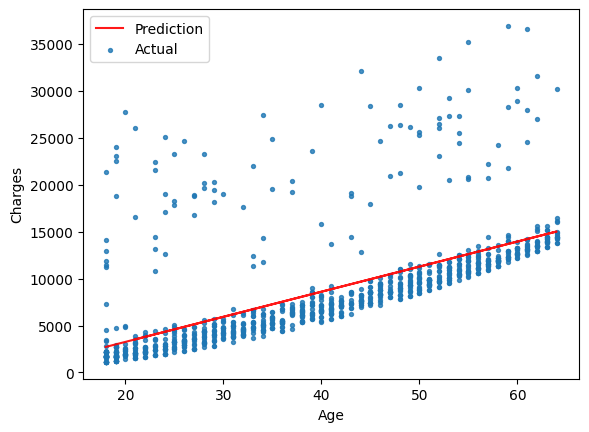

In [ ]:
try_parameters(model.coef_, model.intercept_)

### Machine Learning

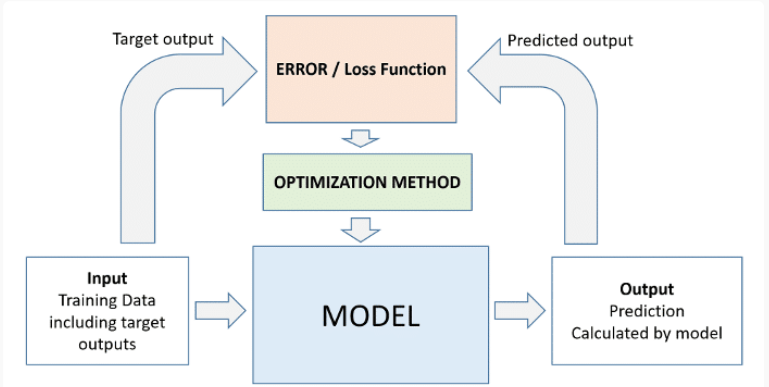

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


### Learning Model using Multiple Features

Rumus:

**charges= w1 × age + w2 × bmi + b**

In [ ]:
# Create inputs and targets (Penambahan BMI)
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [ ]:
# Create inputs and targets (Penambahan BMI)
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038247


In [ ]:
# Untuk semua dataset
# Create inputs and targets (Penambahan BMI dan children)
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [ ]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

### **Using Categorical Features for Machine Learning**

1. Binary Encoding (Untuk 2 Kategori):
Jika sebuah kolom hanya memiliki dua pilihan (biner), kita cukup menggantinya dengan angka 0 dan 1. Contoh pada datamu: Kolom smoker.

    * Kita ubah "no" menjadi 0.

    * Kita ubah "yes" menjadi 1.

    Dengan cara ini, model bisa menghitung: "Jika status perokok adalah 1, tambahkan biaya asuransi sekian rupiah."

2. One-Hot Encoding (Untuk > 2 Kategori):
Jika kategorinya banyak dan tidak memiliki urutan tertentu, kita membuat kolom baru untuk setiap kategori yang ada. Contoh pada datamu: Kolom region (southwest, southeast, northwest, northeast). Kita akan membuat 4 kolom baru:

    * Kolom is_southwest: berisi 1 jika ya, 0 jika tidak.

    * Kolom is_southeast: berisi 1 jika ya, 0 jika tidak, dan seterusnya.

    Ini mencegah model menganggap satu wilayah lebih "tinggi" nilainya daripada wilayah lain secara acak.

3. Ordinal Encoding (Untuk Kategori Berurutan):
Teknik ini digunakan jika kategori tersebut memiliki tingkatan atau urutan logis. Contoh: Tingkat kepuasan pelanggan atau suhu.

    * Cold = 1

    * Neutral = 2

    * Warm = 3

    * Hot = 4

    Dengan memberikan angka berurutan, model belajar bahwa "Hot" (4) memiliki nilai atau dampak yang lebih besar daripada "Cold" (1).

### **Binary Categories**

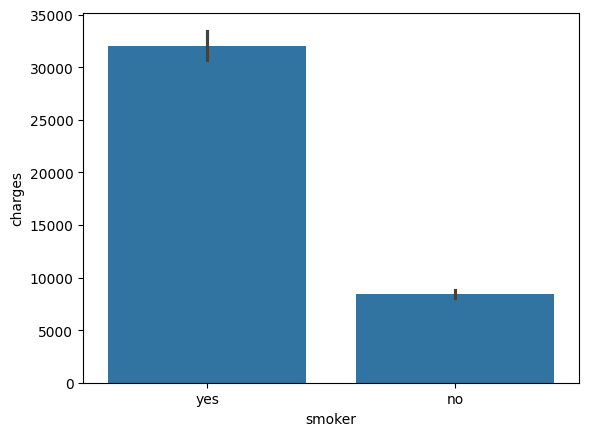

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [ ]:
smoker_codes = {'no' : 0, 'yes' : 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [ ]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [ ]:
# Untuk semua dataset
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

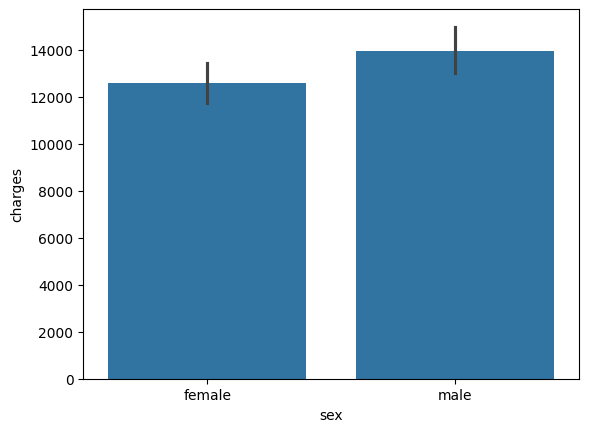

In [ ]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [ ]:
sex_codes = {'female' : 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  
0               1         0  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
1333            0         1  
1334            0         0  
1335            0         0  
1336            0         0  
1337            1         0  

[1338 rows x 9 columns]

In [ ]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [ ]:
# Untuk semua dataset
# Create inputs and targets (Penambahan BMI, children, smoker_code, dan sex_code)
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


### One Hot Encoding

One-Hot Encoding adalah teknik untuk mengubah data kategorikal (teks/label) menjadi format angka sehingga bisa diproses oleh algoritma Machine Learning. Teknik ini khusus digunakan untuk kolom yang memiliki lebih dari dua kategori dan tidak memiliki urutan atau tingkatan tertentu (non-ordinal).

<Axes: xlabel='region', ylabel='charges'>

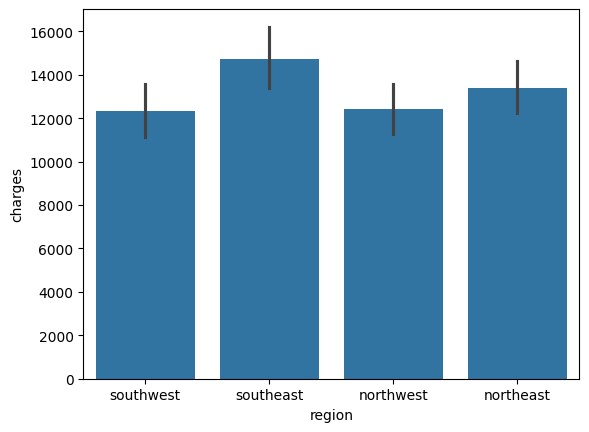

In [ ]:
sns.barplot(data=medical_df, x='region', y='charges')

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

age     sex     bmi  children smoker     region      charges  northeast  \
0      19  female  27.900         0    yes  southwest  16884.92400        0.0   
1      18    male  33.770         1     no  southeast   1725.55230        0.0   
2      28    male  33.000         3     no  southeast   4449.46200        0.0   
3      33    male  22.705         0     no  northwest  21984.47061        0.0   
4      32    male  28.880         0     no  northwest   3866.85520        0.0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830        0.0   
1334   18  female  31.920         0     no  northeast   2205.98080        1.0   
1335   18  female  36.850         0     no  southeast   1629.83350        0.0   
1336   21  female  25.800         0     no  southwest   2007.94500        0.0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0.0   

      northwest  southeast  southwest  
0           0.0        0.0        1.0  
1           0.0        1.0        0.0  
2           0.0        1.0        0.0  
3           1.0        0.0        0.0  
4           1.0        0.0        0.0  
...         ...        ...        ...  
1333        1.0        0.0        0.0  
1334        0.0        0.0        0.0  
1335        0.0        1.0        0.0  
1336        0.0        0.0        1.0  
1337        1.0        0.0        0.0  

[1338 rows x 11 columns]

In [ ]:
# Untuk semua dataset
# Create inputs and targets (Penambahan BMI, children, smoker_code, dan sex_code)
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']

# Create and train model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Nilai Loss (RMSE) sebesar 6041.68 setelah melakukan One-Hot Encoding pada kolom region menunjukkan kualitas model saat memprediksi seluruh dataset

In [ ]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code','northeast', 'northwest', 'southeast', 'southwest']
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [ ]:
print('Estimate charges: ', model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]]))


Estimate charges:  [29875.81463599]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Model Improvements

**Feature Scalling**

Feature Scaling adalah teknik untuk menyamakan "skala" atau rentang nilai dari semua kolom fitur dalam dataset

Bayangkan kamu memiliki dua fitur:

Usia (Age): Rentang nilainya 18 sampai 64.

Biaya (Charges): Rentang nilainya 1.000 sampai 60.000.

Karena angka 60.000 jauh lebih besar daripada 64, algoritma Machine Learning (seperti SGD atau Linear Regression) bisa "salah sangka" dan menganggap bahwa kolom biaya jauh lebih penting daripada usia hanya karena angkanya lebih besar. Feature Scaling menyeimbangkan keduanya agar model bisa belajar secara adil.

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
model.intercept_

np.float64(-12525.547811195444)

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

* Age: Rentangnya lebar (18-64).

* Smoker/Region: Hanya angka 0 atau 1.

Karena rentangnya beda jauh, model "terpaksa" memberikan angka bobot (weight) yang besar pada kolom kecil (seperti smoker_code yang mencapai 23.848) agar pengaruhnya bisa setara dengan kolom yang angkanya besar.

Tanpa scaling, kita tidak bisa bilang "Smoker adalah fitur paling penting" hanya karena angkanya 23.000.

Bisa jadi, angka 23.000 itu muncul hanya karena input-nya cuma 0 dan 1.

Jika kita melakukan Standardization (mengubah semua kolom agar punya rata-rata 0 dan standar deviasi 1), maka semua bobot akan berada di "lapangan tanding" yang adil. Baru di saat itulah kita bisa melihat mana fitur yang benar-benar berpengaruh paling besar.

**Pentingnya Feature Scaling**
1. Masalah: Jika satu fitur punya rentang angka besar (1000-60.000) dan fitur lain kecil (0-1), model akan mengabaikan fitur yang kecil.

2. Solusi: Samakan skala semua fitur (Standardization) agar model lebih adil dalam menilai pentingnya setiap kolom.

In [ ]:
medical_df

age     sex     bmi  children smoker     region      charges  northeast  \
0      19  female  27.900         0    yes  southwest  16884.92400        0.0   
1      18    male  33.770         1     no  southeast   1725.55230        0.0   
2      28    male  33.000         3     no  southeast   4449.46200        0.0   
3      33    male  22.705         0     no  northwest  21984.47061        0.0   
4      32    male  28.880         0     no  northwest   3866.85520        0.0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830        0.0   
1334   18  female  31.920         0     no  northeast   2205.98080        1.0   
1335   18  female  36.850         0     no  southeast   1629.83350        0.0   
1336   21  female  25.800         0     no  southwest   2007.94500        0.0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0.0   

      northwest  southeast  southwest  sex_code  smoker_code  
0           0.0        0.0        1.0         0            1  
1           0.0        1.0        0.0         1            0  
2           0.0        1.0        0.0         1            0  
3           1.0        0.0        0.0         1            0  
4           1.0        0.0        0.0         1            0  
...         ...        ...        ...       ...          ...  
1333        1.0        0.0        0.0         1            0  
1334        0.0        0.0        0.0         0            0  
1335        0.0        1.0        0.0         0            0  
1336        0.0        0.0        1.0         0            0  
1337        1.0        0.0        0.0         0            1  

[1338 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

Fungsi utama dari **StandardScaler** adalah untuk melakukan Feature Scaling (penyetaraan skala) pada data numerik sehingga setiap fitur memiliki bobot yang adil saat diproses oleh model Machine Learning.

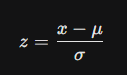

* $\mu$ (Mean): Rata-rata diubah menjadi 0.

* $\sigma$ (Std Dev): Simpangan baku diubah menjadi 1.

* Ini memastikan data terpusat di titik nol, yang sangat membantu algoritma seperti Linear Regression atau Gradient Descent untuk bekerja lebih stabil.

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


Nilai loss pada liniar regression tidak begitu berubah

In [ ]:
# Cek rata-rata dan standar deviasi kolom yang di-scale
print(scaled_numeric_inputs.mean(axis=0))
print(scaled_numeric_inputs.std(axis=0))

[-1.80556450e-16 -2.12419353e-16 -5.57600802e-17]
[1. 1. 1.]


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

**Perubahan "Nilai" Per Satu Satuan**
1. Awal (256): Ini adalah bobot untuk 1 tahun. Artinya, setiap seseorang bertambah tua 1 tahun, biayanya naik $256.

2. Setelah Scaling (3.607): Ini adalah bobot untuk 1 Standar Deviasi. Karena kamu menggunakan StandardScaler, satu satuan age sekarang bukan lagi 1 tahun, melainkan sekitar 14 tahun (standar deviasi usia di dataset ini).

3. Logikanya: Kenaikan biaya untuk rentang 14 tahun (setelah scaling) tentu jauh lebih besar daripada kenaikan biaya untuk 1 tahun saja (sebelum scaling). Itulah kenapa angkanya melonjak ke 3.607.

**Urutan Indikator yang Paling Berpengaruh:**
1. Status Perokok - smoker_code
2. Usia - age
3. BMI - bmi

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Define numeric and categorical columns
numeric_cols = ['age', 'bmi', 'children']
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']

# 2. Scale numeric columns
scaler = StandardScaler()
scaled_numeric_inputs = scaler.fit_transform(medical_df[numeric_cols])

# 3. Get categorical data
categorical_inputs = medical_df[cat_cols].values

# 4. Concatenate scaled numeric and categorical data to form the final inputs array
inputs = np.concatenate((scaled_numeric_inputs, categorical_inputs), axis=1)
targets = medical_df.charges

# 5. Create and train the model
model = LinearRegression().fit(inputs, targets)

# 6. Generate predictions
predictions = model.predict(inputs)

# 7. Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

# 8. Lihat bobot baru
all_features = numeric_cols + cat_cols
weights_df = pd.DataFrame({
    'feature': np.append(all_features, 'intercept'),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

Loss: 6041.6796511744515


feature        weight
3  smoker_code  23848.534542
9    intercept   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

### Creating a Test Set


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [ ]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6594.5120238599575


In [ ]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5982.004404797384
